Steps
1. Install dependencies
2. Collect Dataset
3. Writie Script
4. Analyze Graph


## Step 1

Install Dependencies

pip install csv (read data), numpy (perform calculation), scikit-learn (build the predictive model), matplotlib (plot graph)

In [4]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

## Step 2 & 3 

In [5]:
#initialize two empty list
num = []
accuracy = []

#function that will fill them both with the relevant data
def get_data(hyperp_new):
    with open(hyperp_new, 'r' ) as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            num.append(int(row[0]))
            accuracy.append(float(row[1]))
    return

![Alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBfskiOe2Ey1ecABUbWvZWDlQD06zaOeDqiexoQG-uakqJ7pu1) 

A support vector machine is a linear seperator. It takes data that's already classified and try to predict a set of unclassified data. so if we only have two data classes it would look like below. it will be the line such that the distances from the closest points in each of the two groups would be farthest away. When we add a new data point to our graph depending on which side of the line it is, we could classify accordingly with a label.

![Alt text](https://66.media.tumblr.com/0e459c9df3dc85c301ae41db5e058cb8/tumblr_inline_n9xq5hiRsC1rmpjcz.jpg)

But right now, we are not predicting a class label , so we dont need to classify. Instead, we predicting the next value in a series which means we want to use regression. SVM can be use for regression. Support Vector Regression is a type of SVM that uses the space between data points as a margin of error and predicts the most likely next point in a data set.

![Alt text](https://i.stack.imgur.com/ZyGQp.png)

We want two thing with SVR

1. A line with the largest minimum margin
2. A line that coreectly separates as many instances as possible

But we can't always have both. "C" determines how much we want the latter. 

c:\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


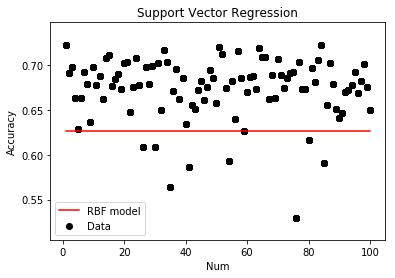

0.6265000105


In [11]:
#funtion to build our predictive model and graph it well
def predict_accuracy(num, accuracy,x):
    num = np.reshape(num,(len(num), 1))
    accuracy = np.reshape(accuracy,(len(accuracy), 1))
    x = np.reshape(x,(-1,1))
    
    #linear support vector regression
    #takes three parameter (kernel- type of SVM), 
    #(penalty parameter C of the error term- 1e3 (scientific notation for 1000) )
    #svr_lin = SVR(kernel= 'linear', C=1e3, gamma='auto')
    #polynomial - that there are no gurantees for one optmization to woork better than the other)
    #svr_poly = SVR(kernel= 'poly', C=1e3, gamma='auto', degree = 3, epsilon=.1, coef0=1)
    #svr radial basis funtion - define similarity to be the Euclidean distance between two inputs
    #if both are right on top of each other, the max similarity is 1 
    #if too far is 0
    #gamma defines how far too far
    svr_rbf = SVR(kernel= 'rbf', C=1e3, gamma=0.1, epsilon=.1)
    
    #fit or train train each of our models on our num  and accuracy
    #svr_lin.fit(num, accuracy)
    #svr_poly.fit(num, accuracy)
    svr_rbf.fit(num, accuracy)
    
    #plotting graph
    plt.scatter(num, accuracy, color='black', label='Data')
    plt.plot(num, svr_rbf.predict(num), color='red', label='RBF model')
    #plt.plot(num, svr_lin.predict(num), color='green', label='Linear model')
    #plt.plot(num, svr_poly.predict(num), color='blue', label='Polynomial model')
    plt.xlabel('Num')
    plt.ylabel('Accuracy')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    #return predictions to each of our model
    return svr_rbf.predict(x)[0]
#, svr_lin.predict(x)[0], svr_poly.predict(x)[0]

#get our data 
get_data('hyperp_new.csv')

#create variable to store our predicted accuracy given our num and accuracy 
predicted_accuracy = predict_accuracy(num, accuracy, 101)

print(predicted_accuracy)
#print("RBF:", predicted_accuracy[0],"LIN:", predicted_accuracy[1],"POLY:", predicted_accuracy[2])
